# 生成出了10000个50x50x50二值化图像的样本，孔隙度由0至1。

In [1]:
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
import csv
import os
import os
from PIL import Image
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.optimizers import SGD,RMSprop,Adam
from keras.layers import Conv2D,MaxPooling2D

Using TensorFlow backend.


In [50]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

In [59]:
def show_data(file,size):
  data = np.loadtxt(file,delimiter=",",skiprows=0)
  P=[]
  for i in range(0,len(data)):
    if data[i]==0:
        x=i%size
        y=int(i/size)%size
        z=int(i/(size*size))
        P.append([x,y,z])
  P=np.array(P)
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.scatter3D(P[:,0],P[:,1],P[:,2],c='k')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  ax.set_title('data')
  plt.show()

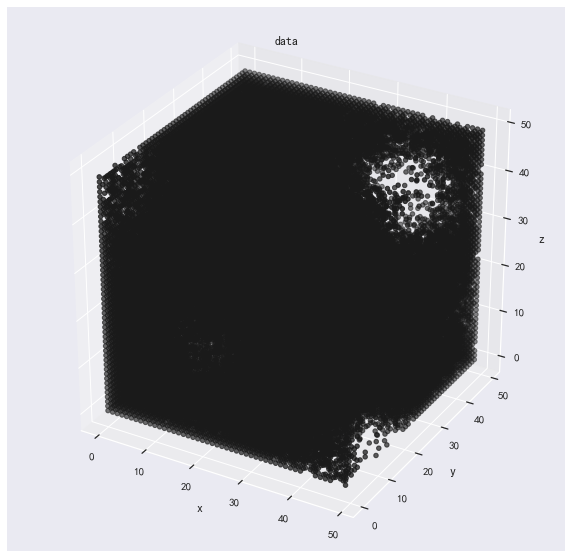

In [60]:
show_data("G:/data70.csv",50)

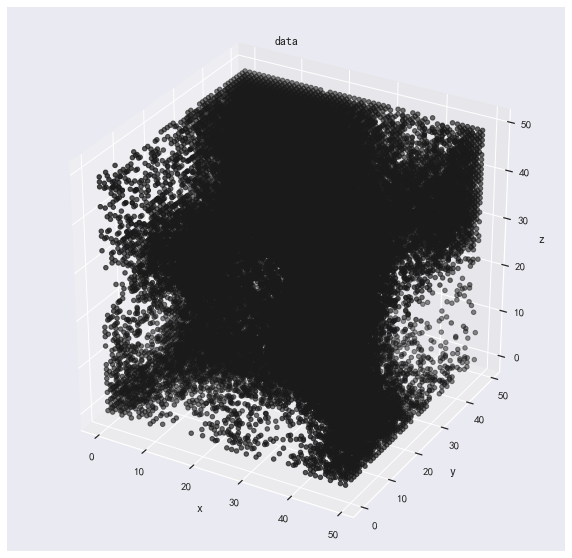

In [61]:
show_data("G:/data143.csv",50)

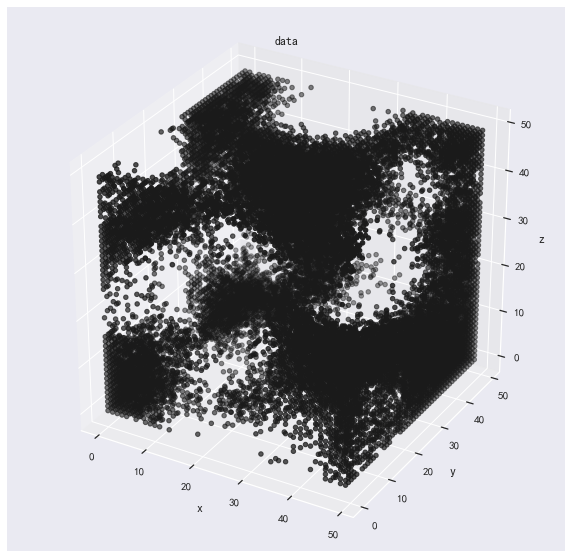

In [62]:
show_data("G:/data7361.csv",50)

In [2]:
data = pd.read_csv("F:/mywork/data.csv")

In [3]:
data.describe()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,porosity,specificSurfaceArea,meanBreadth,eulerNumber
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.074208,12.892600,35.710800,22.818200,24.289333,24.311514,13.482760,0.556307,0.005909,-1.087423,6.338912,0.460757,0.326335,1010.378485,-32.572800
std,0.062775,2.193164,2.281568,2.866820,2.115211,1.611091,1.378311,0.060848,0.118519,0.171528,3.079520,0.274717,0.138069,1698.635957,786.323247
min,-0.000011,4.000000,11.000000,2.666667,8.000000,8.337657,1.593529,0.085237,-0.824105,-1.810909,1.719803,0.045408,0.001207,-3465.300000,-3338.000000
25%,0.008453,12.000000,35.333333,22.333333,23.666667,23.810860,13.442471,0.549257,-0.037888,-1.173414,4.150245,0.214135,0.239110,-289.497500,-557.250000
50%,0.067164,12.333333,36.333333,23.666667,24.333333,24.367030,13.841308,0.569862,0.004599,-1.138531,5.458451,0.414450,0.331170,1168.500000,34.000000
75%,0.133491,13.333333,36.666667,24.333333,25.000000,24.825732,14.070108,0.582108,0.050779,-1.064627,7.914005,0.694413,0.416700,2221.475000,604.000000
max,0.189822,36.333333,46.666667,34.000000,41.833333,39.742037,16.608982,0.811502,1.148918,1.708877,19.457059,0.998690,0.707420,6499.000000,2013.000000


In [4]:
data.head()

,label,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,porosity,specificSurfaceArea,meanBreadth,eulerNumber
0,0.139707,12.333333,36.333333,24.000000,24.333333,24.381301,14.065408,0.576893,0.031724,-1.159762,8.153378,0.20730,0.35875,-66.00,-678
1,0.106818,12.000000,36.333333,24.333333,24.333333,24.390834,14.148785,0.580086,0.008994,-1.196956,8.071872,0.26535,0.33301,950.33,-133
2,0.097962,13.333333,36.666667,23.333333,25.666667,25.000768,13.792478,0.551682,-0.085055,-1.135637,7.054699,0.32314,0.37434,1099.30,-22
3,0.127619,11.666667,36.333333,24.666667,23.666667,23.950023,14.104867,0.588929,0.033662,-1.161501,7.868250,0.20850,0.36712,66.00,-634
4,0.000684,7.666667,36.000000,28.333333,18.000000,21.512252,15.391541,0.715478,0.263196,-1.335490,2.278612,0.87290,0.22480,2753.00,1034


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

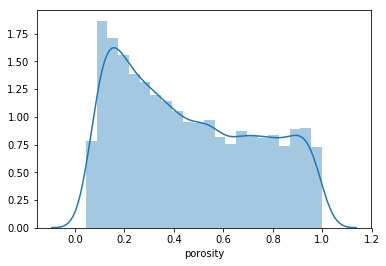

In [8]:
sns.distplot(data['porosity'])  
plt.show()

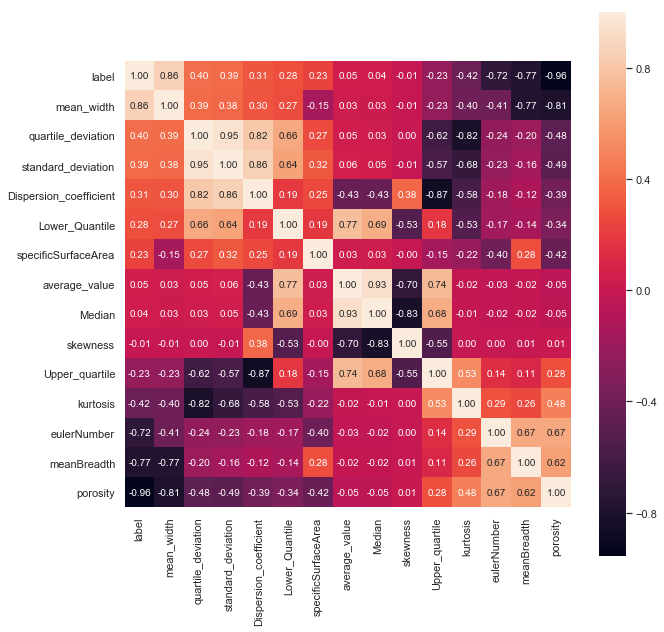

In [9]:
corrmat = data.corr()
plt.figure(figsize=(10,10))
k = 15 
cols = corrmat.nlargest(k, 'label')['label'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [10]:
X=data[['Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value',
        'standard_deviation','Dispersion_coefficient','skewness','kurtosis','mean_width',
        'porosity','specificSurfaceArea','meanBreadth','eulerNumber']]
Y=data[['label']]

In [11]:
#归一化
max_min_scaler = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
N_X=X[:].apply(max_min_scaler)

In [12]:
N_X.head()

,Upper_quartile,Lower_Quantile,quartile_deviation,Median,average_value,standard_deviation,Dispersion_coefficient,skewness,kurtosis,mean_width,porosity,specificSurfaceArea,meanBreadth,eulerNumber
0,0.257732,0.710280,0.680851,0.482759,0.510873,0.830603,0.676965,0.433766,0.184996,0.362715,0.169826,0.506282,0.341148,0.497103
1,0.247423,0.710280,0.691489,0.482759,0.511176,0.836156,0.681361,0.422245,0.174429,0.358120,0.230721,0.469834,0.443145,0.598953
2,0.288660,0.719626,0.659574,0.522167,0.530598,0.812426,0.642252,0.374578,0.191850,0.300773,0.291343,0.528358,0.458095,0.619697
3,0.237113,0.710280,0.702128,0.463054,0.497140,0.833231,0.693537,0.434748,0.184502,0.346640,0.171085,0.518134,0.354395,0.505326
4,0.113402,0.700935,0.819149,0.295567,0.419515,0.918921,0.867783,0.551084,0.135071,0.031505,0.868045,0.316608,0.624058,0.817044


# PCA降维

In [13]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=0.99)
newX = pca.fit_transform(N_X)

In [19]:
newX.shape

(10000, 7)

# ANN-keras

In [20]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(1))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
model.compile(loss='mse',optimizer='adam')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(newX,Y, test_size=0.2, random_state=0)

In [24]:
from keras.callbacks import EarlyStopping

In [26]:
early_stopping=EarlyStopping(monitor='loss',patience=3,verbose=0)
train_history=model.fit(X_train,y_train,epochs=1000,batch_size=100,verbose=1,validation_data=[X_test,y_test],callbacks=[early_stopping])

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 0s 10us/step - loss: 5.1745e-05 - val_loss: 4.7505e-05
Epoch 2/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1342e-05 - val_loss: 4.8053e-05
Epoch 3/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1173e-05 - val_loss: 4.7548e-05
Epoch 4/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1124e-05 - val_loss: 4.9839e-05
Epoch 5/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1705e-05 - val_loss: 4.7572e-05
Epoch 6/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1015e-05 - val_loss: 4.7867e-05
Epoch 7/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.0993e-05 - val_loss: 4.7435e-05
Epoch 8/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.1677e-05 - val_loss: 4.7855e-05
Epoch 9/1000
8000/8000 [==============================]

In [27]:
def compute_rmse(y1, y2):
    return np.mean((y1 - y2) ** 2) ** 0.5

In [28]:
compute_rmse(np.array(model.predict(X_test)),np.array(y_test))

0.007014312763003602

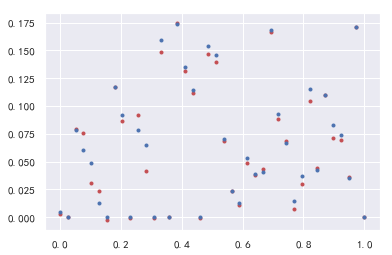

In [29]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,40)
plt.plot(x,np.array(model.predict(X_test[0:40])),'r.',x,np.array(y_test[0:40]),'b.')

# 直接使用minkowski作特征

In [37]:
X=data[['porosity','specificSurfaceArea','meanBreadth','eulerNumber']]
Y=data[['label']]

In [38]:
#归一化
max_min_scaler = lambda x :(x-np.min(x))/(np.max(x)-np.min(x))
N_X=X[:].apply(max_min_scaler)

In [40]:
N_X.head()

,porosity,specificSurfaceArea,meanBreadth,eulerNumber
0,0.169826,0.506282,0.341148,0.497103
1,0.230721,0.469834,0.443145,0.598953
2,0.291343,0.528358,0.458095,0.619697
3,0.171085,0.518134,0.354395,0.505326
4,0.868045,0.316608,0.624058,0.817044


In [41]:
model=Sequential()
model.add(Dense(4,activation='relu',input_dim=4))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.add(Dense(5,activation='softmax'))
model.add(Dense(1))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
X_train, X_test, y_train, y_test = train_test_split(N_X,Y, test_size=0.2, random_state=0)

In [43]:
model.compile(loss='mse',optimizer='adam')
early_stopping=EarlyStopping(monitor='loss',patience=3,verbose=0)
train_history=model.fit(X_train,y_train,epochs=1000,batch_size=100,verbose=1,validation_data=[X_test,y_test],callbacks=[early_stopping])

Train on 8000 samples, validate on 2000 samples
Epoch 1/1000
8000/8000 [==============================] - 1s 72us/step - loss: 0.0308 - val_loss: 0.0084
Epoch 2/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0050 - val_loss: 0.0039
Epoch 3/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0038 - val_loss: 0.0036
Epoch 4/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0034 - val_loss: 0.0032
Epoch 5/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/1000
8000/8000 [==============================] - 0s 10us/step - loss: 0.0025 - val_loss: 0.0021
Epoch 7/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0017 - val_loss: 0.0013
Epoch 8/1000
8000/8000 [==============================] - 0s 9us/step - loss: 0.0010 - val_loss: 7.1314e-04
Epoch 9/1000
8000/8000 [==============================] - 0s 9us/step - loss: 5.4481e-04 - val_loss: 3.6839e-04
Ep

In [44]:
compute_rmse(np.array(model.predict(X_test)),np.array(y_test))

0.0071388572771410395

# 只是用porosity	

In [45]:
from sklearn import linear_model

In [46]:
x=data[['porosity']]
y=data[['label']]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [48]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
compute_rmse(np.array(model.predict(x_test)),np.array(y_test))

0.018165209325125536

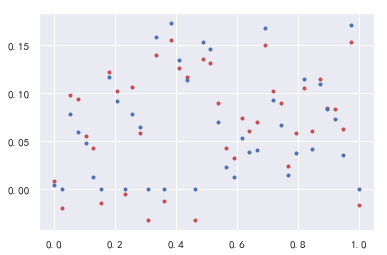

In [49]:
plt.figure()
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
x = np.linspace(0,1,40)
plt.plot(x,np.array(model.predict(x_test[0:40])),'r.',x,np.array(y_test[0:40]),'b.')

# 预测误差集中在电导率0.25-0.1之间。孔隙度与电导率的线性关系最强。采用多种特征项比只使用孔隙度作线性回归的rmse小一半，可见除了孔隙度外的其他项对电导率预测具有一定的积极效益。这可能是数据未能够饱和，才导致无法得出更好结果。

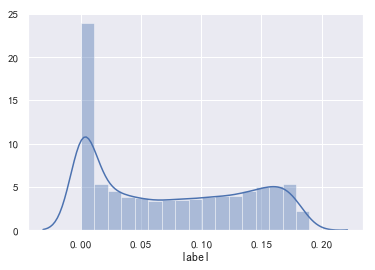

In [63]:
sns.distplot(data['label'])  
plt.show()